In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv'
data = pd.read_csv(file_path)

print("Dataset Shape:", data.shape)
print("\nColumns in Dataset:", data.columns.tolist())
print("\nDataset Info:")
data.info()

print("\nSummary Statistics:")
print(data.describe())


Dataset Shape: (1800, 15)

Columns in Dataset: ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 

Missing Values:
 Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


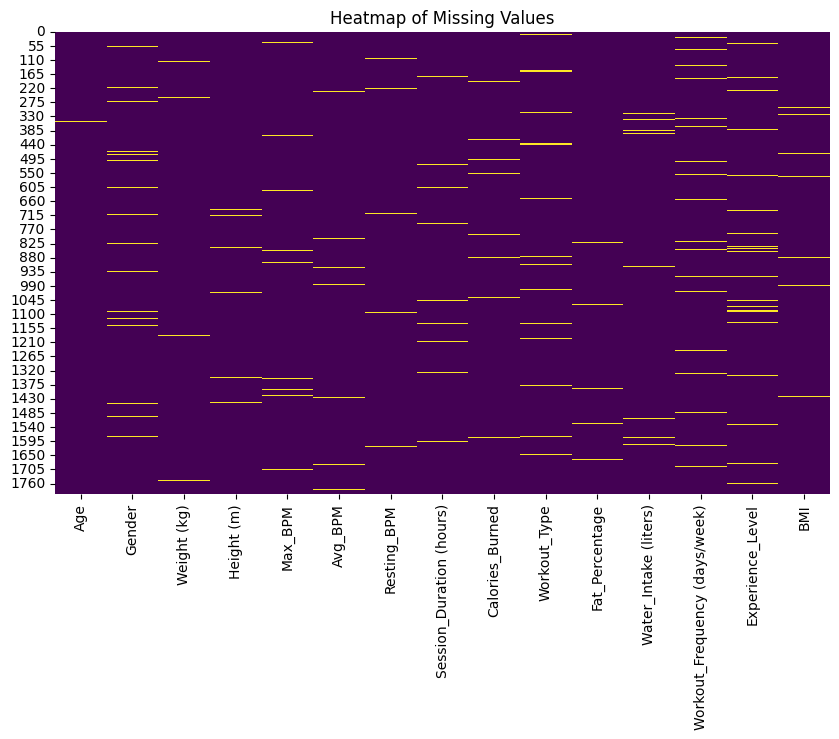


Missing values after imputation:
 Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                      0
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


In [3]:
# Check missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

#handling missing values
for col in ['Age', 'Weight (kg)', 'Height (m)']:
    data[col] = data[col].fillna(data[col].mean())

for col in ['Gender', 'Workout_Type']:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing values after imputation:\n", data.isnull().sum())



In [4]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print("Duplicate Rows:", duplicate_count)

data = data.drop_duplicates()
print("Shape after removing duplicates:", data.shape)


Duplicate Rows: 0
Shape after removing duplicates: (1800, 15)


In [5]:
# Validating
data['Max_BPM'] = pd.to_numeric(data['Max_BPM'], errors='coerce')
data['Max_BPM'] = data['Max_BPM'].fillna(data['Max_BPM'].mean())

data['Gender'] = data['Gender'].str.strip().str.capitalize()
data['Workout_Type'] = data['Workout_Type'].str.strip().str.capitalize()

print("\nUnique Values in Gender:", data['Gender'].unique())
print("Unique Values in Workout_Type:", data['Workout_Type'].unique())



Unique Values in Gender: ['Female' 'Male']
Unique Values in Workout_Type: ['Strength' 'Cardio' 'Hiit' 'Yoga' '\\nstrength' '\\tcardio' '\\tyoga']


In [6]:

data['Calculated_BMI'] = data['Weight (kg)'] / (data['Height (m)'] ** 2)

#BMI
bmi_discrepancy = (data['Calculated_BMI'] - data['BMI']).abs() > 0.1

data.loc[bmi_discrepancy, 'BMI'] = data['Calculated_BMI']

# Create a new feature:Workout_Intensity (Average BPM / Maximum BPM)
data['Workout_Intensity'] = data['Avg_BPM'] / data['Max_BPM']

print("\nNew features added: 'Calculated_BMI' and 'Workout_Intensity'")
print(data[['Calculated_BMI', 'Workout_Intensity']].head())



New features added: 'Calculated_BMI' and 'Workout_Intensity'
   Calculated_BMI  Workout_Intensity
0       25.060701           0.873563
1       25.291887           0.939759
2       18.933528           0.887701
3       22.732762           0.903743
4       17.439556           0.954802


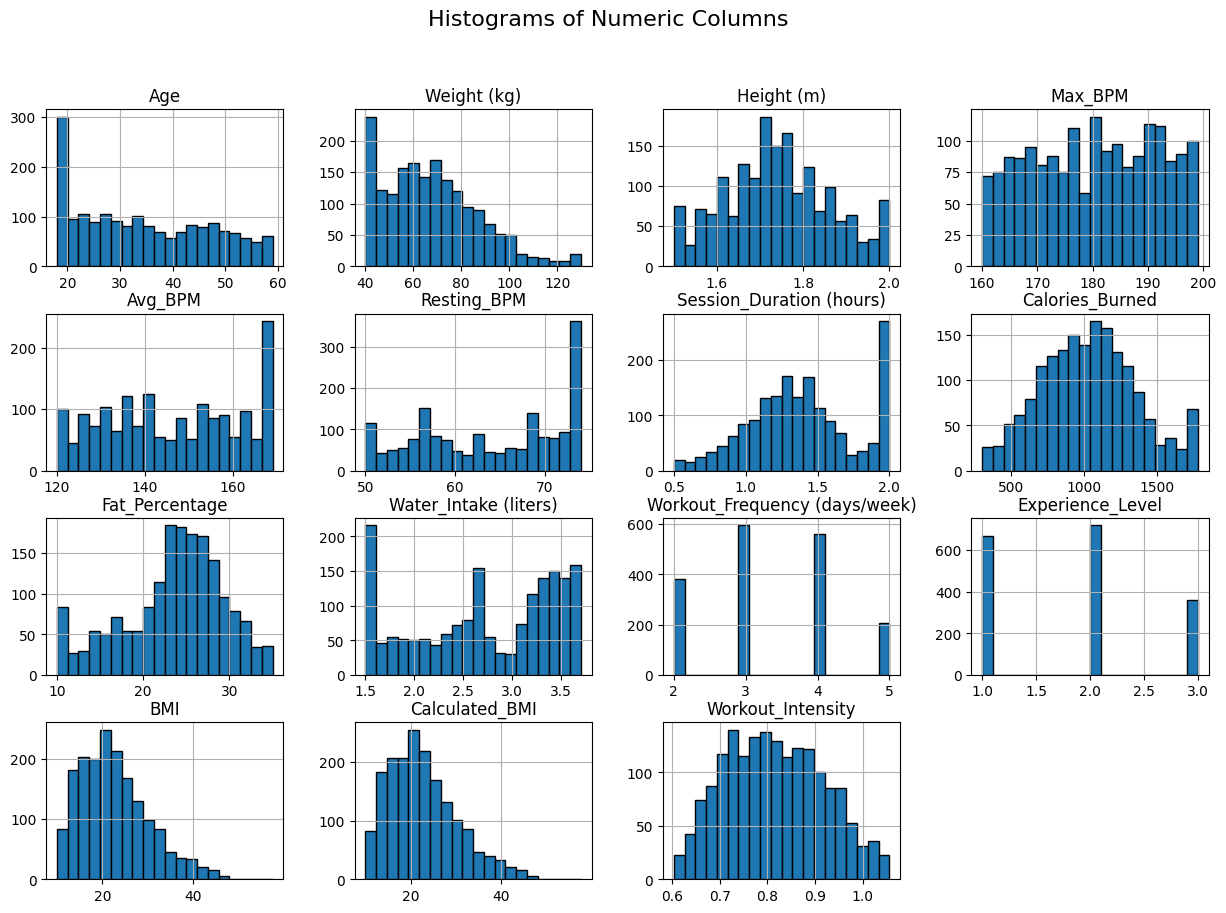

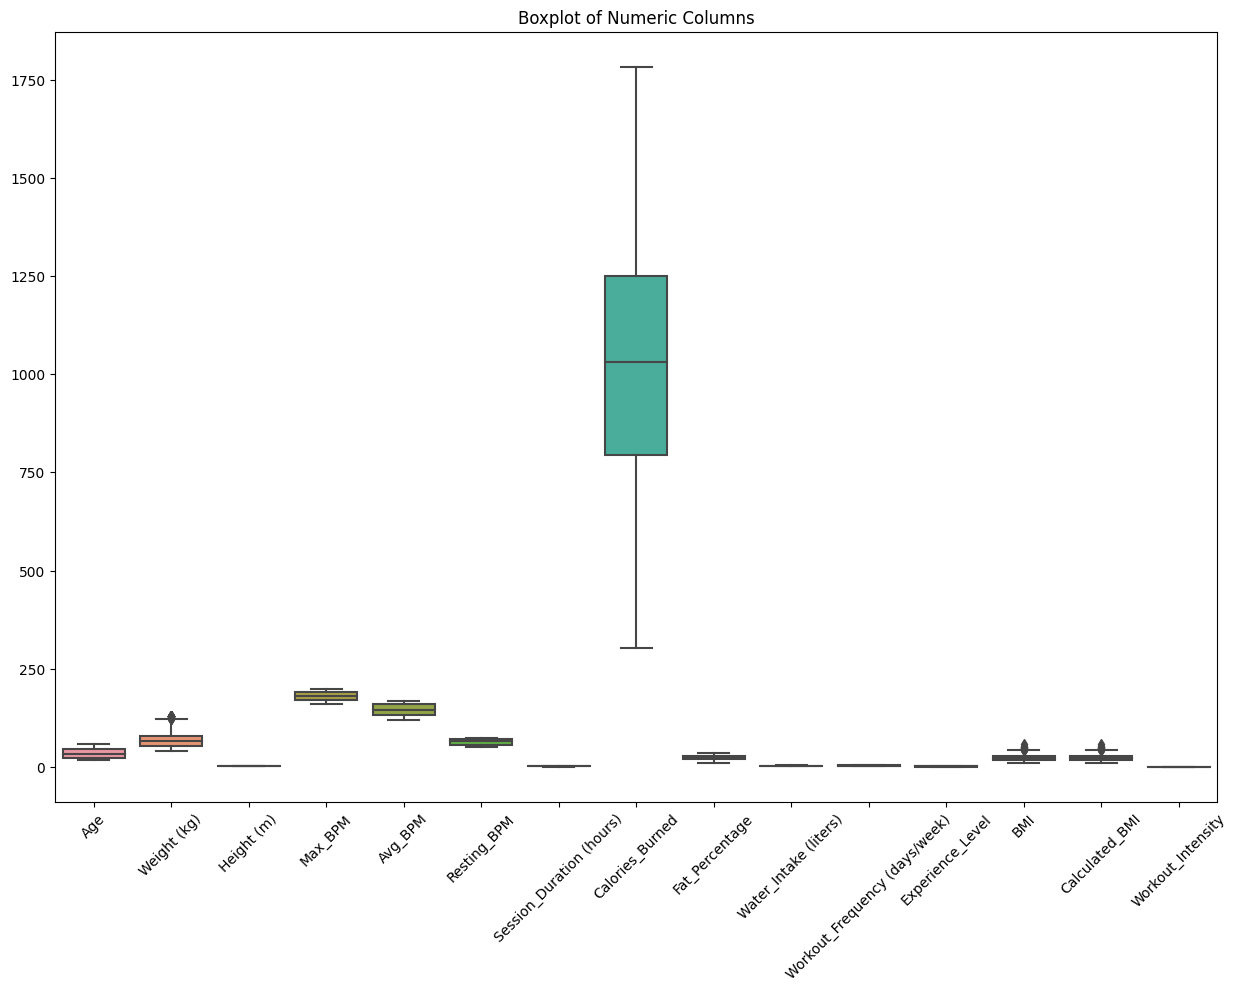

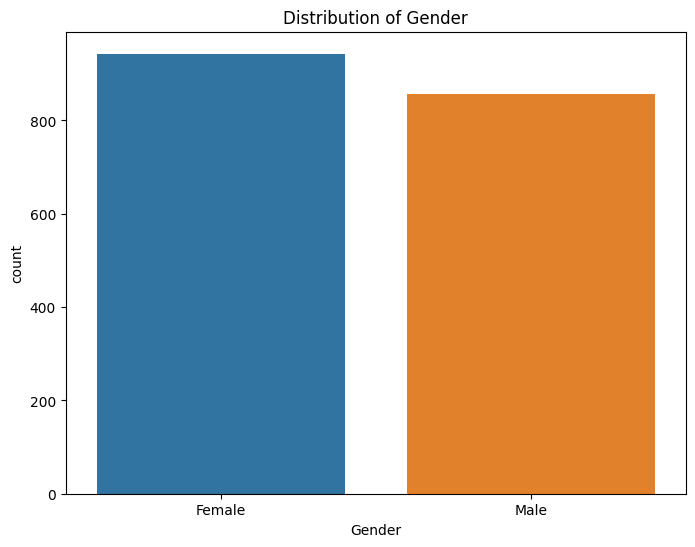

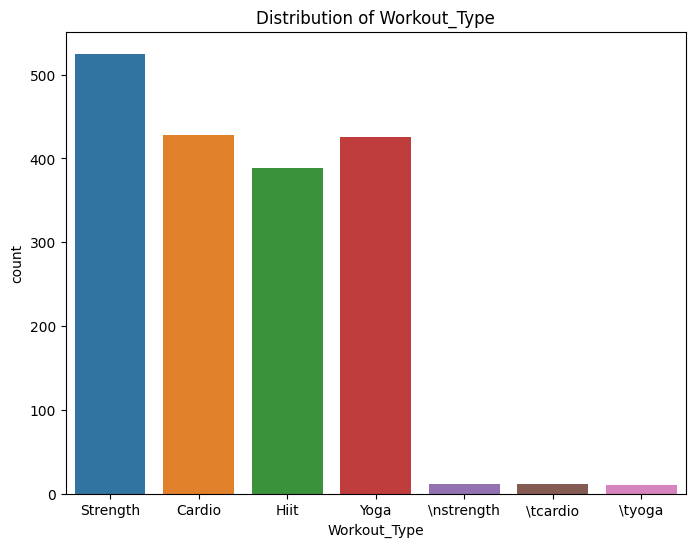

In [7]:
# Ploting histograms
numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.show()

# Ploting boxplots 
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

# Ploting bar
categorical_columns = ['Gender', 'Workout_Type']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)  # Pass the column name via `x` argument
    plt.title(f'Distribution of {col}')
    plt.show()


Outliers in BMI:
       Age  Gender  Weight (kg)  Height (m)    Max_BPM  Avg_BPM  Resting_BPM  \
20    26.0    Male        129.9        1.71  196.00000    136.0         74.0   
21    22.0  Female        102.4        1.50  173.00000    156.0         55.0   
23    18.0    Male        129.4        1.50  177.00000    145.0         71.0   
33    20.0  Female        103.4        1.53  180.00000    166.0         56.0   
42    23.0    Male        107.6        1.50  180.23307    136.0         71.0   
129   31.0  Female        129.9        1.70  190.00000    169.0         69.0   
266   33.0  Female        129.9        1.69  168.00000    152.0         74.0   
378   19.0  Female        129.9        1.71  161.00000    169.0         56.0   
422   47.0    Male        121.4        1.61  164.00000    155.0         74.0   
500   35.0  Female        127.6        1.65  174.00000    156.0         56.0   
573   37.0    Male        108.7        1.55  163.00000    122.0         68.0   
592   33.0  Female     

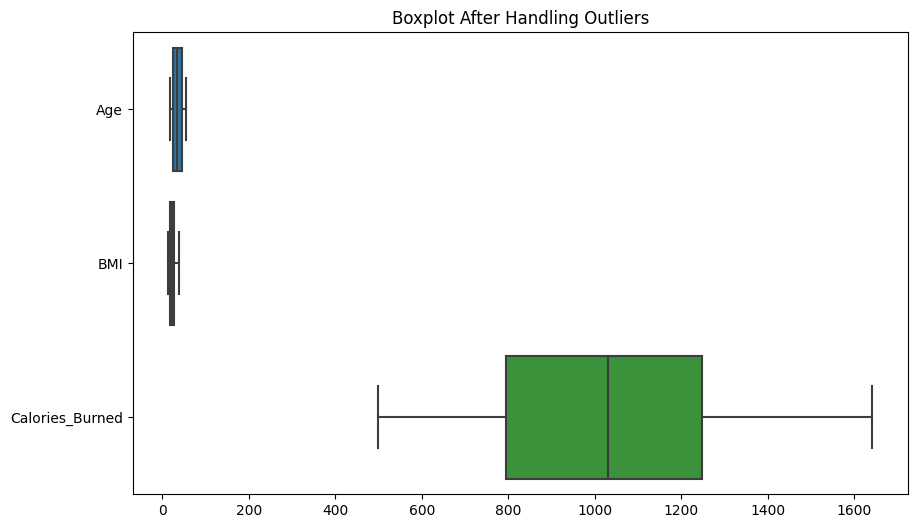

In [8]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#detection
outliers_bmi = detect_outliers(data, 'BMI')
print(f"Outliers in BMI:\n{outliers_bmi}")

# Handle outliers 
for col in ['Age', 'BMI', 'Calories_Burned']:
    lower_cap = data[col].quantile(0.05)
    upper_cap = data[col].quantile(0.95)
    data[col] = np.clip(data[col], lower_cap, upper_cap)

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'BMI', 'Calories_Burned']], orient="h")
plt.title('Boxplot After Handling Outliers')
plt.show()


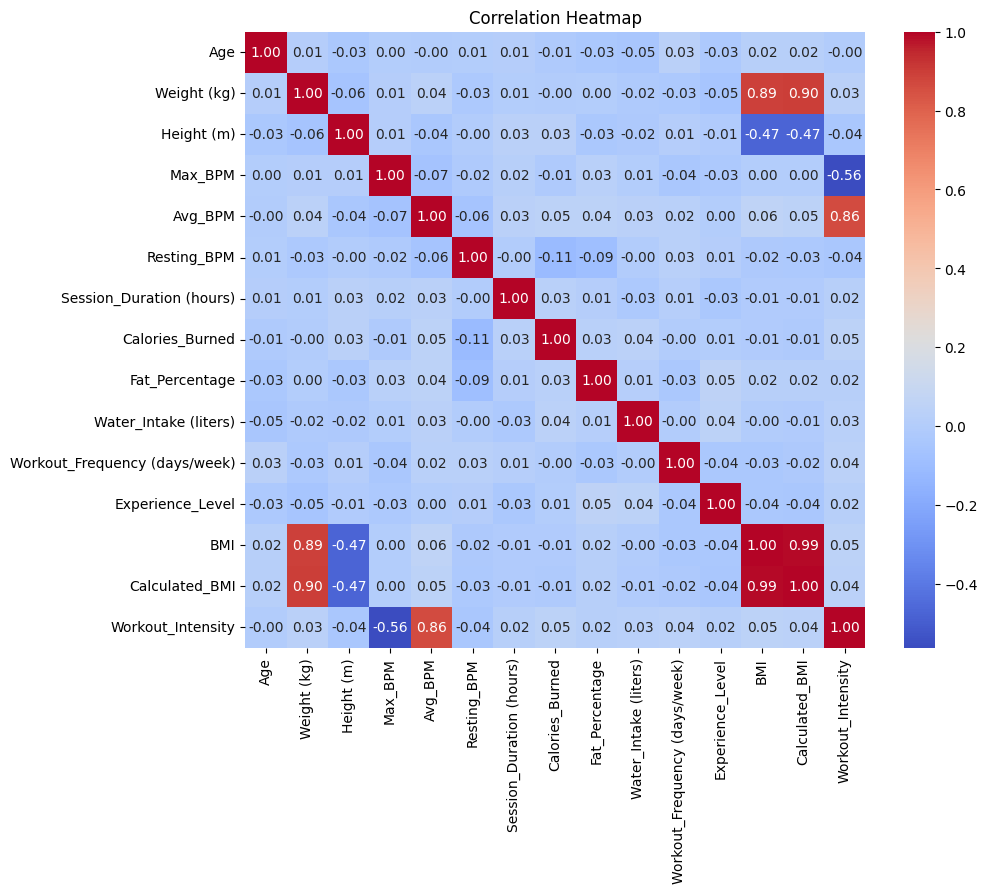

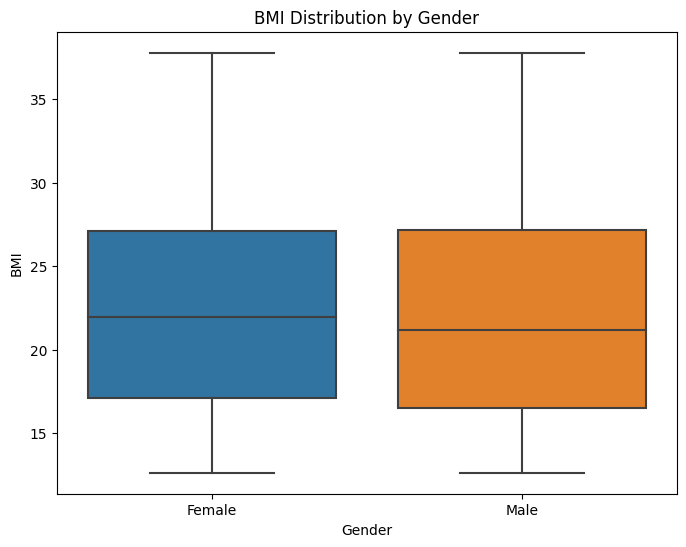

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


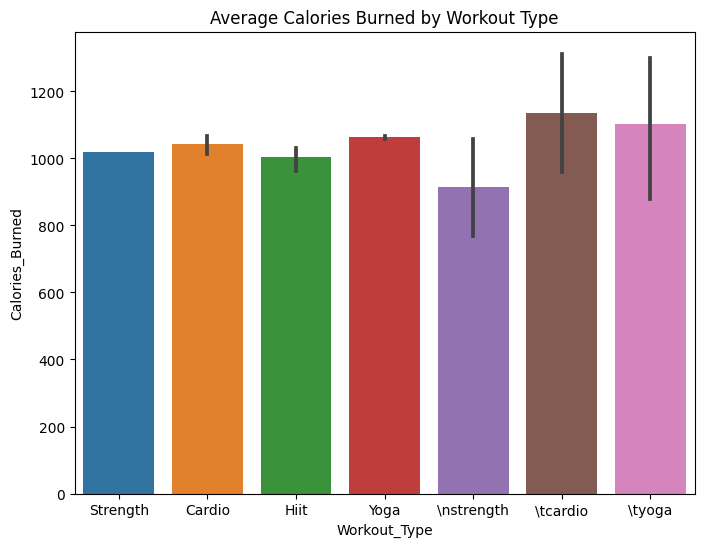

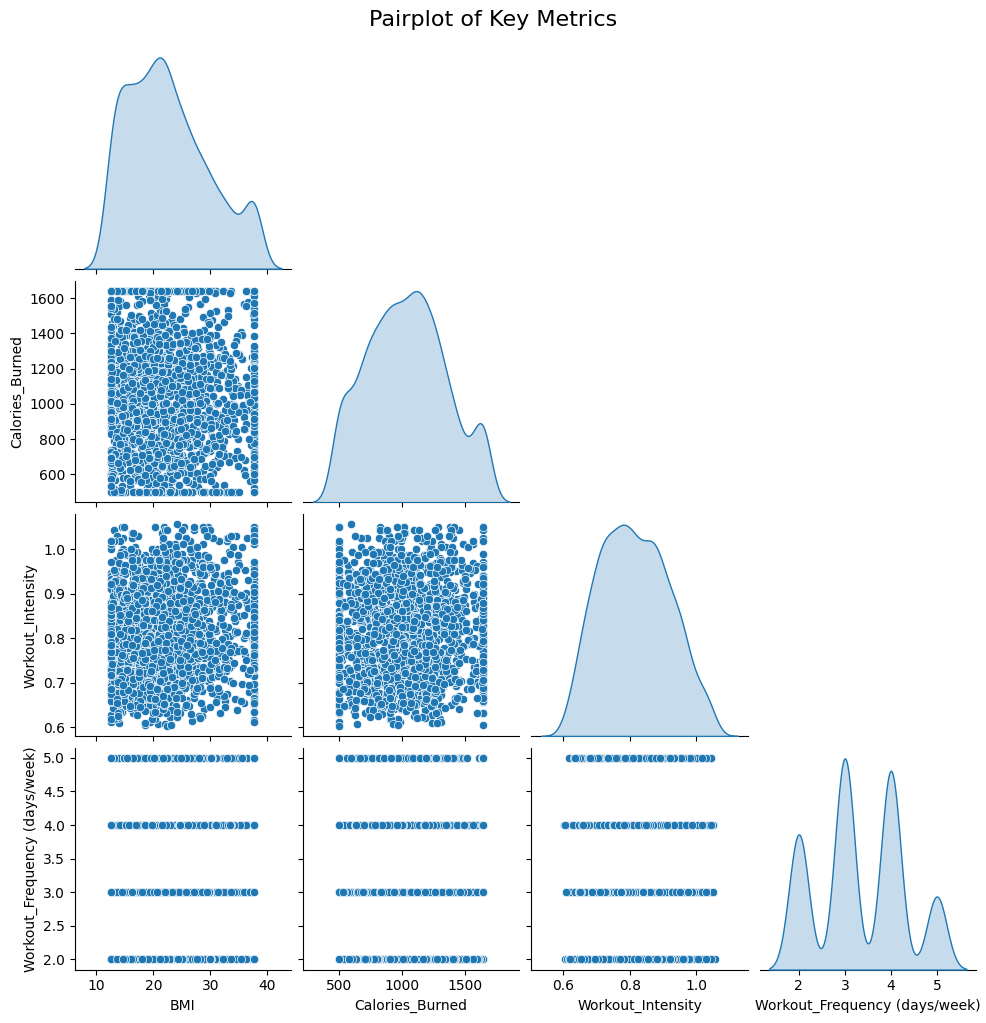

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Suppress FutureWarning related to seaborn's use_inf_as_na option
warnings.simplefilter(action='ignore', category=FutureWarning)

# Subset only numeric columns for correlation
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Boxplot: Analyze BMI distribution across genders
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='BMI', data=data)
plt.title('BMI Distribution by Gender')
plt.show()

# Bar plot: Compare Calories_Burned across workout types
plt.figure(figsize=(8, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', data=data, estimator=np.mean)
plt.title('Average Calories Burned by Workout Type')
plt.show()

# Pair plot: Analyze multi-variable relationships
selected_columns = ['BMI', 'Calories_Burned', 'Workout_Intensity', 'Workout_Frequency (days/week)']
sns.pairplot(data[selected_columns], diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Metrics', y=1.02, fontsize=16)
plt.show()


In [10]:

data_encoded = pd.get_dummies(data, columns=['Gender', 'Workout_Type'], drop_first=True)
# Displaying the first few rows of the encoded data
print("Encoded Data:\n", data_encoded.head())


Encoded Data:
     Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0         86.7        1.86    174.0    152.0         74.0   
1  26.0         84.7        1.83    166.0    156.0         73.0   
2  22.0         64.8        1.85    187.0    166.0         64.0   
3  54.0         75.3        1.82    187.0    169.0         58.0   
4  34.0         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.12            712.0            12.8   
1                      1.00            833.0            27.9   
2                      1.24           1642.2            28.7   
3                      1.45            628.0            31.8   
4                      1.60           1286.0            26.4   

   Water_Intake (liters)  ...        BMI  Calculated_BMI  Workout_Intensity  \
0                    2.4  ...  25.060701       25.060701           0.873563   
1                    2.8  ...  25.29188

In [11]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = ['Calories_Burned', 'Session_Duration (hours)', 'Workout_Intensity']

# Initializing
scaler = MinMaxScaler()

# Normalizing
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Normalized Data:\n", data[numeric_cols].head())


Normalized Data:
    Calories_Burned  Session_Duration (hours)  Workout_Intensity
0         0.186319                  0.413333           0.596927
1         0.292162                  0.333333           0.742979
2         1.000000                  0.493333           0.628119
3         0.112841                  0.633333           0.663515
4         0.688418                  0.733333           0.776170


Summary of Findings:

Average Calories Burned by Gender:
 Gender
Female    1076.943
Male      1314.755
Name: Calories_Burned, dtype: float64

Correlation between Session Duration and Calories Burned:
                         Session_Duration (hours)  Calories_Burned
Session_Duration (hours)                     1.000             0.456
Calories_Burned                             0.456             1.000

BMI Distribution by Gender:
        count   mean        std   min   25%   50%   75%   max
Gender
Female    122  23.49   5.689  12.5  19.0  22.0  26.2  39.9
Male      100  24.31   6.347  12.5  19.5  22.5  27.2  41.0

Average Calories Burned by Workout Type:
 Workout_Type
Cardio        1294.215
Strength      1095.322

Summary of Workout Intensity:
The 'Workout_Intensity' variable, calculated as Avg_BPM/Max_BPM, indicates how intense a workout session was relative to its max BPM.

Key Insights:
- There are significant differences in the average calories burned between different genders and workout types.
- Session Duration and Calories Burned show a positive correlation, indicating longer workouts burn more calories.
- BMI distribution varies by gender, with some clear trends based on gender-specific body composition.
